In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
diadf=pd.read_csv('Diabetes_prediction.csv')
# Load and preprocess the dataset

In [3]:
diadf.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diagnosis
0,2,115.863387,56.410731,24.336736,94.385783,26.455940,0.272682,20.100494,0
1,2,92.490122,70.615520,23.443591,138.652426,23.910167,0.665160,44.912281,0
2,1,88.141469,63.262618,23.404364,149.358082,21.948250,0.676022,48.247873,1
3,2,108.453101,67.793632,20.751580,108.751638,24.209304,0.289636,42.749868,0
4,1,127.849443,94.725685,22.603078,25.269987,32.997477,0.601315,32.797789,0


In [4]:
print(diadf.isnull().sum().sum())
#Total missing values

0


In [5]:
diadf.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diagnosis
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,1.771000,99.440607,72.179837,23.278316,84.582679,25.433600,0.449383,43.281798,0.30600
std,1.354398,19.470730,13.882017,1.173807,74.872733,3.690223,0.199334,14.465398,0.46106
min,0.000000,30.571402,31.401487,19.369987,-165.310033,13.548818,0.100037,-0.979804,0.00000
25%,1.000000,86.145927,62.795447,22.501591,35.076535,23.022715,0.283376,33.518451,0.00000
50%,2.000000,99.458362,71.909588,23.275225,84.442232,25.455649,0.448219,43.634273,0.00000
75%,3.000000,113.264556,82.082660,24.052022,134.267842,27.972184,0.619158,53.098446,1.00000
max,8.000000,161.238939,110.723715,26.917654,317.701852,36.324598,0.799654,90.573782,1.00000


In [6]:
diadf['Age'] = diadf['Age'].apply(lambda x: diadf['Age'].median() if x < 0 else x)
#Handling invalid values in other columns

In [7]:
diadf['Glucose'] =diadf['Glucose'].apply(lambda x: min(max(x, 70), 200))
diadf['BloodPressure'] = diadf['BloodPressure'].apply(lambda x: min(max(x, 80), 200))
diadf['Insulin'] = diadf['Insulin'].apply(lambda x: min(max(x, 10), 500))

In [8]:
diadf = diadf[diadf['Diagnosis'].isin([0, 1])]

In [9]:
diadf.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diagnosis
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,1.771000,99.982846,82.608720,23.278316,90.884055,25.433600,0.449383,43.370679,0.30600
std,1.354398,18.392210,5.463846,1.173807,64.695394,3.690223,0.199334,14.329989,0.46106
min,0.000000,70.000000,80.000000,19.369987,10.000000,13.548818,0.100037,2.082077,0.00000
25%,1.000000,86.145927,80.000000,22.501591,35.076535,23.022715,0.283376,33.567786,0.00000
50%,2.000000,99.458362,80.000000,23.275225,84.442232,25.455649,0.448219,43.637792,0.00000
75%,3.000000,113.264556,82.082660,24.052022,134.267842,27.972184,0.619158,53.098446,1.00000
max,8.000000,161.238939,110.723715,26.917654,317.701852,36.324598,0.799654,90.573782,1.00000


In [10]:
diadf['Diagnosis'].value_counts()

,count
Diagnosis,
0,694
1,306


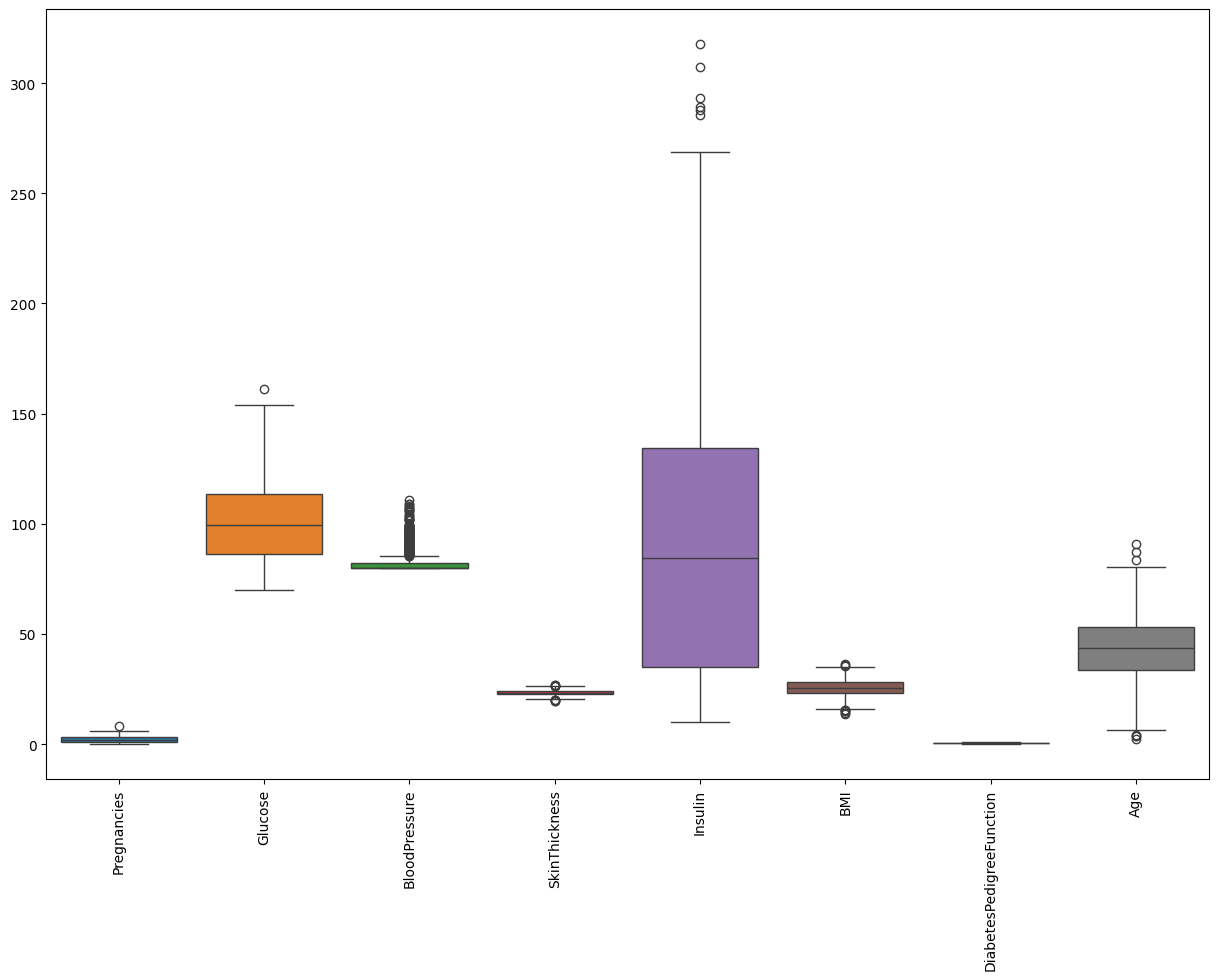

In [11]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=diadf.drop(columns=['Diagnosis']))
plt.xticks(rotation=90)
plt.show()
# Boxplot for outlier visualization

In [12]:
# def remove_outliers(diadf, columns):
#     for col in columns:
#         Q1 = diadf[col].quantile(0.25)
#         Q3 = diadf[col].quantile(0.75)
#         IQR = Q3 - Q1
#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR
#         diadf = diadf[(diadf[col] >= lower_bound) & (diadf[col] <= upper_bound)]
#     return diadf

In [13]:
# columns_to_check = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']
# diadfclean= remove_outliers(diadf, columns_to_check)

In [14]:
# print("Original shape:", diadf.shape)
# print("New shape after outlier removal:", diadfclean.shape)

with loss of 21% of data due to outlier removal ,commented it

In [15]:
X = diadf.drop(columns='Diagnosis', axis=1)
y = diadf['Diagnosis']

In [16]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
# Feature scaling and data splitting

In [17]:
# print(X_scaled)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn import svm
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

In [19]:
model = svm.SVC(kernel='linear')
model.fit(X_train, y_train)
# Model training

SVC(kernel='linear')

In [20]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
# Model evaluation

In [21]:
print("Training Accuracy:", train_score)
print("Test Accuracy:", test_score)

Training Accuracy: 0.69375
Test Accuracy: 0.695


In [22]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      1.00      0.82       139
           1       0.00      0.00      0.00        61

    accuracy                           0.69       200
   macro avg       0.35      0.50      0.41       200
weighted avg       0.48      0.69      0.57       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [23]:
#Prediction on New Data
input_data = (2,116,56,24,94,26,0.27,20)
# Convert to numpy array and reshape
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
# std_data = scaler.transform(input_data_reshaped)

prediction = model.predict(input_data_reshaped)
if prediction[0] == 0:
    print('The person is not diabetic')
else:
    print('The person is diabetic')

The person is not diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [24]:
import pickle

In [25]:
filename =  'Diabetes_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [26]:
saved_model = pickle.load(open('Diabetes_model.sav', 'rb'))

In [27]:
#Prediction on New Data
input_data = (2,116,56,24,94,26,0.27,20)
# Convert to numpy array and reshape
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
# std_data = scaler.transform(input_data_reshaped)

prediction = saved_model.predict(input_data_reshaped)
if prediction[0] == 0:
    print('The person is not diabetic')
else:
    print('The person is diabetic')

The person is not diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
